# Hands-on 4: Logistic Regression Notebook (Tutorial)

**Autor:** Angel Parada  
**Fecha:** 29 de noviembre del 2025  

## 1.1 Fundamentos de la técnica
La Regresión Logística es una técnica de clasificación supervisada que se usa cuando queremos predecir una categoría, no un número. A diferencia de la regresión lineal, que predice valores continuos, la regresión logística sirve para contestar preguntas del tipo:

¿Este correo es spam o no spam?

¿Un paciente tiene riesgo o no riesgo?

¿Una flor es de la especie Setosa, Versicolor o Virginica?

Aunque tiene la palabra “regresión”, en realidad no predice números, sino probabilidades que luego convertimos en clases.

## 1.2 Modelo Matemático
La función sigmoide:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
El modelo predice:
$$
P(y=1|x) = \sigma(w^T x + b)
$$

1. Vector de características *$𝑥$*
Es el conjunto de valores de entrada (como medidas, datos o atributos) que describen cada ejemplo del dataset.

2. Pesos *$𝑤$*
Son valores que el modelo aprende y que indican la importancia de cada característica.
Un peso alto influye más en la predicción.

3. Sesgo *$𝑏$*
Es un valor adicional que ajusta la salida del modelo, ayudando a desplazar la frontera de decisión.
4. Combinación lineal *$ 𝑧 = 𝑤^𝑇 𝑥 + 𝑏 $*
Es la suma de las características multiplicadas por sus pesos. Representa una primera estimación antes de convertirla en probabilidad.

5. Función sigmoide *$𝜎(𝑧)$*
Convierte el valor *$𝑧$* en una probabilidad entre 0 y 1.
Si el resultado es alto, la probabilidad de pertenecer a la clase 1 aumenta; si es bajo, disminuye.

6. Probabilidad final *$P(y=1|x) = \sigma(w^T x + b)$*
Representa qué tan probable es que el ejemplo pertenezca a la clase positiva.

## 1.3 Librerías utilizadas
- **pandas**: Sirve para cargar datasets, manipular tablas, calcular estadísticas y hacer análisis exploratorio (promedios, desviaciones, etc.).
- **numpy**: Se utiliza para trabajar con arreglos numéricos y realizar operaciones matemáticas.
En Machine Learning es útil para manejar vectores, matrices y transformaciones de datos.
- **matplotlib**: Se utiliza para hacer gráficos, como el scatter plot del preprocesamiento.
- **scikit-learn**: implementación de LogisticRegression, métricas y preprocesamiento
- **seaborn**: Utilizado para el mapeo de la matriz de confusion con mapas de calor

**Clases y funciones más importantes**
**train_test_split**: Divide el dataset en: train (entrenamiento) y test (evaluación final). Esto evita sobreajuste y permite medir el rendimiento real del modelo.

**StandardScaler**: Sirve para escalar los datos, dejándolos con: media = 0, desviación estándar = 1. Esto es muy importante en Regresión Logística porque mejora la estabilidad del modelo.

**LogisticRegression**: Es la clase principal para entrenar el modelo.
Funciones principales:
- fit(X, y) → entrena el modelo
- predict(X) → predice clases
- predict_proba(X) → devuelve probabilidades
- score(X, y) → calcula accuracy

**confusion_matrix**: Genera una matriz que muestra:
- verdaderos positivos (TP)
- verdaderos negativos (TN)
- falsos positivos (FP)
- falsos negativos (FN)
Sirve para analizar errores del modelo de manera más precisa.

## 1.4 Pipeline

### Preprocesamiento

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Cargar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Estadísticas
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


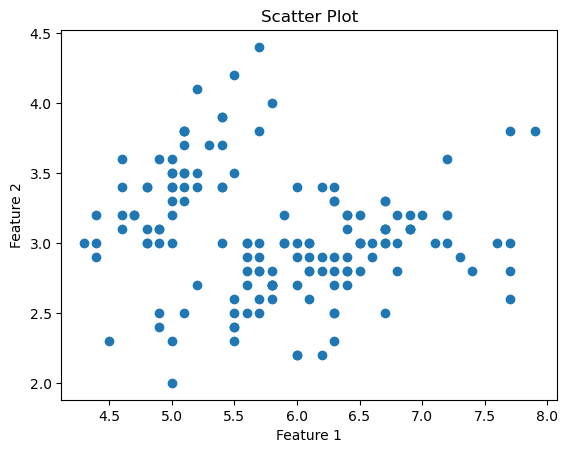

In [25]:
# Scatter plot
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot')
plt.show()

### Prediction

Valores originales del patrón:
[6.1 2.8 4.7 1.2]

Valores escalados del patrón:
[ 0.35451684 -0.58505976  0.55777524  0.02224751]

Clase predicha: versicolor
Probabilidades por clase:
  setosa: 0.0115
  versicolor: 0.8760
  virginica: 0.1126


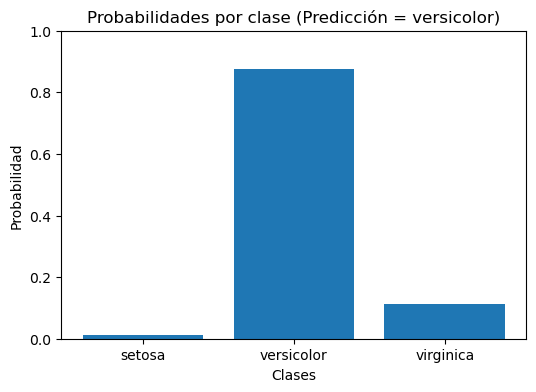

np.str_('versicolor')

In [28]:
# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Modelo
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

# Prediccion
def clasificar_patron(patron):
    print("Valores originales del patrón:")
    print(patron)

    # Escalado
    patron_scaled = scaler.transform([patron])
    print("\nValores escalados del patrón:")
    print(patron_scaled[0])

    # Predicción
    pred = model.predict(patron_scaled)[0]
    prob = model.predict_proba(patron_scaled)[0]

    print(f"\nClase predicha: {iris.target_names[pred]}")
    print("Probabilidades por clase:")
    for clase, p in zip(iris.target_names, prob):
        print(f"  {clase}: {p:.4f}")

    return pred

# Ejemplo de predicción
clasificar_patron(X_test[0])


# Prediccion Grafica
def clasificar_patron_visual(patron):
    patron_escalado = scaler.transform([patron])
    
    # Obtener probabilidades
    prob = model.predict_proba(patron_escalado)[0]
    
    # Convertir clases numéricas a nombres
    clases_nombres = iris.target_names[model.classes_]
    
    # Predicción final
    prediccion = model.predict(patron_escalado)[0]
    prediccion_nombre = iris.target_names[prediccion]
    
    # Gráfico
    plt.figure(figsize=(6,4))
    plt.bar(clases_nombres, prob)
    plt.title(f"Probabilidades por clase (Predicción = {prediccion_nombre})")
    plt.xlabel("Clases")
    plt.ylabel("Probabilidad")
    plt.ylim(0,1)
    plt.show()
    
    return prediccion_nombre
    
clasificar_patron_visual(X_test[0])

### Model Evaluation

Accuracy: 1.0


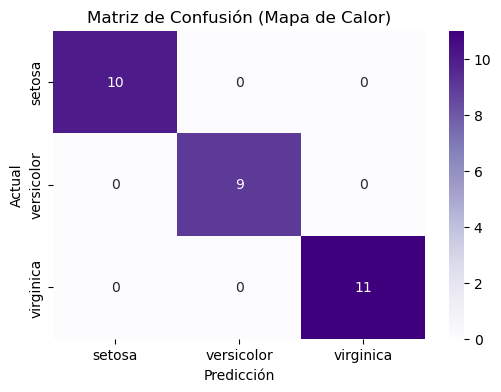

In [31]:
# Escalar datos de prueba
X_test_scaled = scaler.transform(X_test)

# Predicción
y_pred = model.predict(X_test_scaled)

# Métricas
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

# Matriz de confusion visual con mapa de color
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.title("Matriz de Confusión (Mapa de Calor)")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()